In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
mnist=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(mnist.data,mnist.target,test_size=0.2)

In [8]:
model = svm.SVC()
kernel = ['linear', 'rbf']
gamma = [1e-6,1e-3,0.01,'scale']
grid = dict(kernel=kernel,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.989332 using {'gamma': 0.001, 'kernel': 'rbf'}


In [6]:
best_model = svm.SVC(kernel='rbf',gamma=0.001)
best_model.fit(x_train,y_train)

SVC(gamma=0.001)

In [9]:
y_pred=best_model.predict(x_test)
best_model.score(x_test,y_test)

0.9944444444444445

Text(69.0, 0.5, 'Truth')

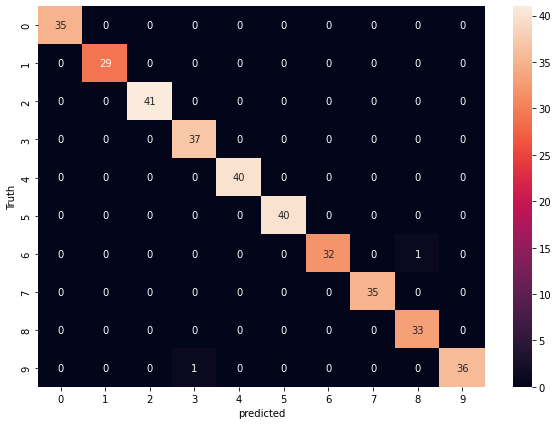

In [11]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')